接着分析中国1989年至2016年社会保障金结余情况：

In [1]:
import xlrd
import pprint
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
path = "./datas/人社部/09-03.xls"
data_rest = xlrd.open_workbook(path)
table = data_rest.sheets()[0]

In [3]:
years = table.col_values(0, start_rowx=11, end_rowx=39)
total = table.col_values(1, start_rowx=11, end_rowx=39)
basic_pension_insurance = table.col_values(2, 11, 39)
unemployment_insurance = table.col_values(3, 11, 39)
urban_basic_medical_insurance = table.col_values(4, 11, 39)
work_injury_insurance = table.col_values(5, 11, 39)
maternity_insurance = table.col_values(6, 11, 39)

In [4]:
new = pd.DataFrame([years,total,basic_pension_insurance,unemployment_insurance,
                    urban_basic_medical_insurance,work_injury_insurance,maternity_insurance],
                   index=['years','total','basic_pension_insurance','unemployment_insurance',
                         'urban_basic_medical_insurance','work_injury_insurance','maternity_insurance'])
new = new.T

In [5]:
new.head()

,years,total,basic_pension_insurance,unemployment_insurance,urban_basic_medical_insurance,work_injury_insurance,maternity_insurance
0,1989,81.6,67.9899,13.6,0,0,0
1,1990,117.339,97.876,19.4628,0,0,0
2,1991,169.7,144.069,25.7,0,0,0
3,1992,252.8,220.608,32.1,0,0,0
4,1993,303.7,258.589,40.8,0.4343,3.1038,0.7614


Text(0.5, 1.0, '历年社保结余组成变化')

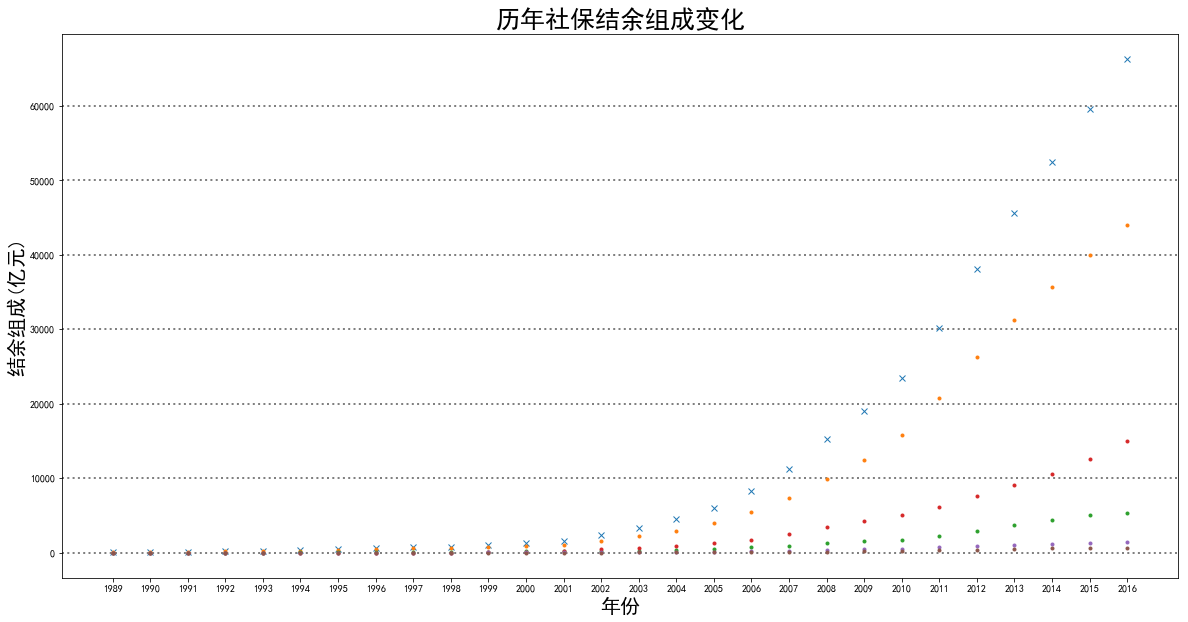

In [6]:
# 绘制点状效果图。此图的绘制不需要堆积，只需要展示在图片上。
# 没有图例版
plt.figure(figsize=(20,10))
plt.plot(years, total,'x', 
         years, basic_pension_insurance,'.',
         years, unemployment_insurance, '.',
         years, urban_basic_medical_insurance, '.',
         years, work_injury_insurance,'.',
         years, maternity_insurance,'.',)

# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成(亿元)", fontsize=20)
plt.title("历年社保结余组成变化", fontsize=25)

Text(0.5, 1.0, '历年社保结余组成变化')

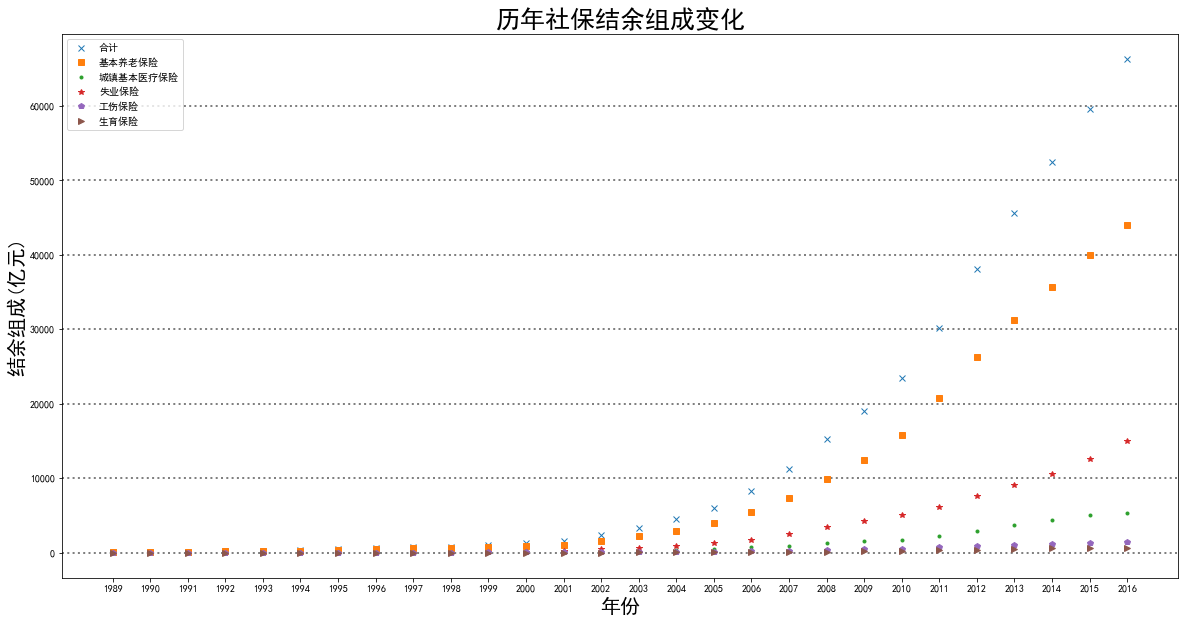

In [7]:
# 增加图例版
plt.figure(figsize=(20,10))
plt.plot(years, total,'x', label='合计',)
plt.plot(years, basic_pension_insurance,'s', label='基本养老保险',)
plt.plot(years, unemployment_insurance, '.', label='城镇基本医疗保险',)
plt.plot(years, urban_basic_medical_insurance, '*', label='失业保险',)
plt.plot(years, work_injury_insurance,'p', label='工伤保险',)
plt.plot(years, maternity_insurance,'>', label='生育保险',)
# 添加图例
plt.legend(loc='upper left')
# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成(亿元)", fontsize=20)
plt.title("历年社保结余组成变化", fontsize=25)

Text(0.5, 1.0, '历年社保结余变化')

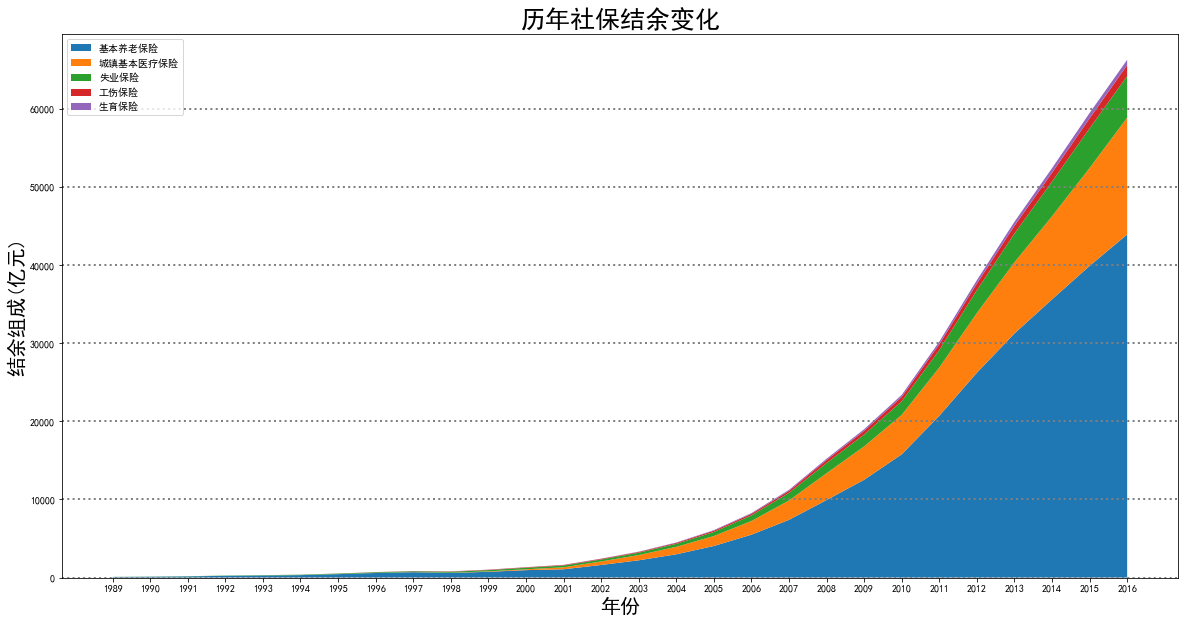

In [8]:
# 堆积柱状图
plt.figure(figsize=(20,10))
plt.stackplot(years, 
              basic_pension_insurance, 
              urban_basic_medical_insurance,
              unemployment_insurance,               
              work_injury_insurance,
              maternity_insurance,
              labels=['基本养老保险', '城镇基本医疗保险', '失业保险','工伤保险', '生育保险'])
# 添加图例
plt.legend(loc='upper left')
# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成(亿元)", fontsize=20)
plt.title("历年社保结余变化", fontsize=25)

In [9]:
# 为了绘制堆叠图，计算百分比。
n = len(basic_pension_insurance)
basic_pension_insurance_p = [basic_pension_insurance[i]/total[i] for i in range(n)]
urban_basic_medical_insurance_p = [urban_basic_medical_insurance[i]/total[i] for i in range(n)]
unemployment_insurance_p = [unemployment_insurance[i]/total[i] for i in range(n)]
work_injury_insurance_p = [work_injury_insurance[i]/total[i] for i in range(n)]
maternity_insurance_p = [maternity_insurance[i]/total[i] for i in range(n)]

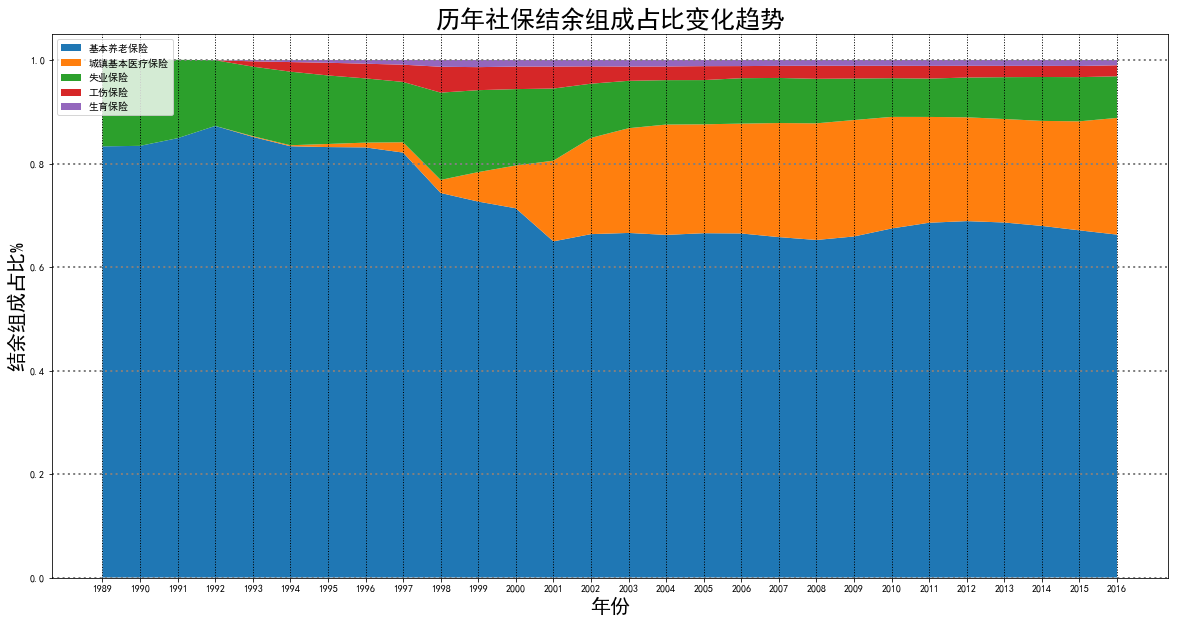

In [10]:
plt.figure(figsize=(20,10))

plt.stackplot(years,
              basic_pension_insurance_p,
             urban_basic_medical_insurance_p,
             unemployment_insurance_p,
             work_injury_insurance_p,
             maternity_insurance_p,
             labels=['基本养老保险', '城镇基本医疗保险', '失业保险','工伤保险', '生育保险'])

# 添加图例
plt.legend(loc='upper left')
plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成占比%", fontsize=20)
plt.title("历年社保结余组成占比变化趋势", fontsize=25)
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
plt.grid(axis='x', color='black', linestyle=':', linewidth=1)

In [11]:
# 为了绘制堆叠图，采用将数据逐一累加后一层覆盖一层进行绘制的方法。此处代码仅可使用一次，以避免反复叠加计算。
n = len(basic_pension_insurance)
basic_pension_insurance_t = basic_pension_insurance
urban_basic_medical_insurance_t = [urban_basic_medical_insurance[i] + basic_pension_insurance_t[i] for i in range(n)]
unemployment_insurance_t = [unemployment_insurance[i] + urban_basic_medical_insurance_t[i] for i in range(n)]
work_injury_insurance_t = [work_injury_insurance[i] + unemployment_insurance_t[i] for i in range(n)]
maternity_insurance_t = [maternity_insurance[i] + work_injury_insurance_t[i] for i in range(n)]

Text(0.5, 1.0, '历年社保结余组成变化')

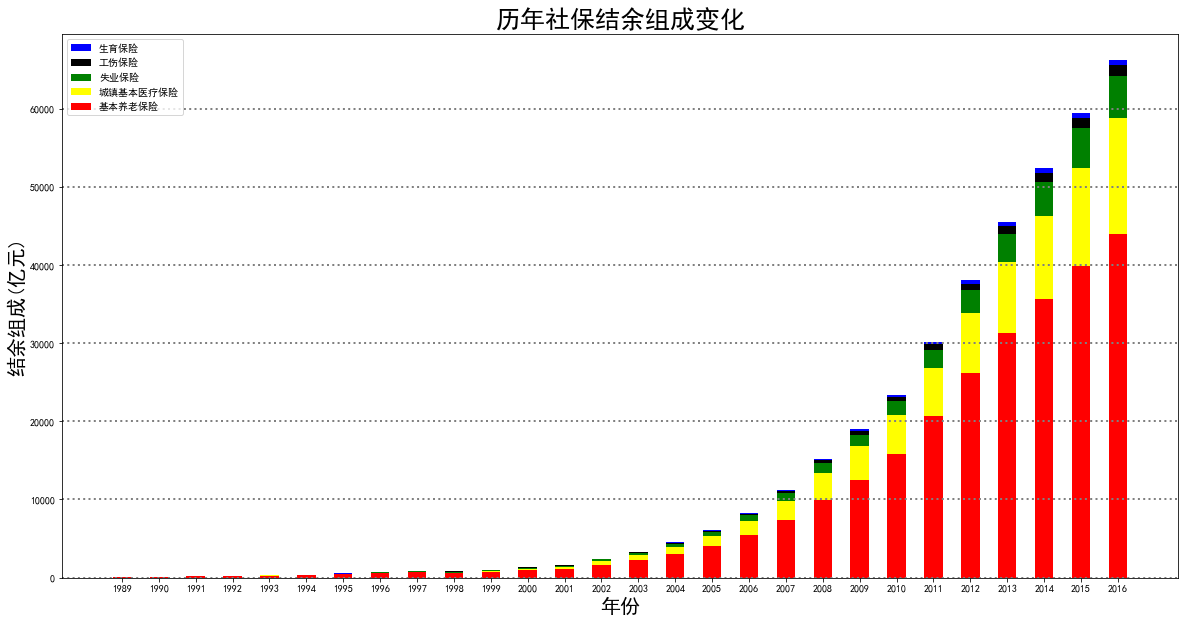

In [12]:
# 堆积柱状图
plt.figure(figsize=(20,10))

plt.bar(years, maternity_insurance_t, width=0.5, color="blue", label='生育保险')
plt.bar(years, work_injury_insurance_t, width=0.5, color="black", label='工伤保险')
plt.bar(years, unemployment_insurance_t, width=0.5, color="green", label='失业保险')
plt.bar(years, urban_basic_medical_insurance_t, width=0.5, color="yellow", label='城镇基本医疗保险')
plt.bar(years, basic_pension_insurance_t, width=0.5, color="red", label='基本养老保险')

# 添加图例和网格线
plt.legend(loc='upper left')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成(亿元)", fontsize=20)
plt.title("历年社保结余组成变化", fontsize=25)

In [13]:
# 为了绘制堆叠图，采用将数据逐一累加后一层覆盖一层进行绘制的方法。此处代码仅可使用一次，以避免反复叠加计算。
n = len(basic_pension_insurance)
basic_pension_insurance_p_t = basic_pension_insurance_p
urban_basic_medical_insurance_p_t = [urban_basic_medical_insurance_p[i] + basic_pension_insurance_p_t[i] for i in range(n)]
unemployment_insurance_p_t = [unemployment_insurance_p[i] + urban_basic_medical_insurance_p_t[i] for i in range(n)]
work_injury_insurance_p_t = [work_injury_insurance_p[i] + unemployment_insurance_p_t[i] for i in range(n)]
maternity_insurance_p_t = [maternity_insurance_p[i] + work_injury_insurance_p_t[i] for i in range(n)]

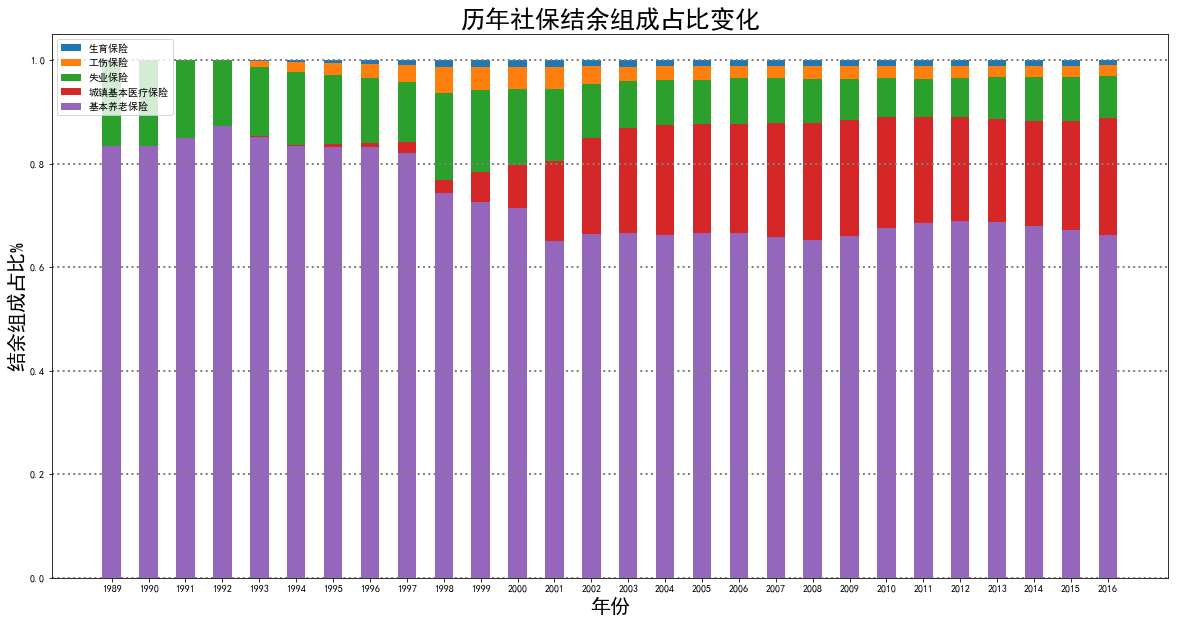

In [14]:
plt.figure(figsize=(20,10))

plt.bar(years, maternity_insurance_p_t, width=0.5, label='生育保险')
plt.bar(years, work_injury_insurance_p_t, width=0.5, label='工伤保险')
plt.bar(years, unemployment_insurance_p_t, width=0.5, label='失业保险')
plt.bar(years, urban_basic_medical_insurance_p_t, width=0.5, label='城镇基本医疗保险')
plt.bar(years, basic_pension_insurance_p_t, width=0.5, label='基本养老保险')

plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成占比%", fontsize=20)
plt.title("历年社保结余组成占比变化", fontsize=25)
# 添加图例
plt.legend(loc='upper left')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

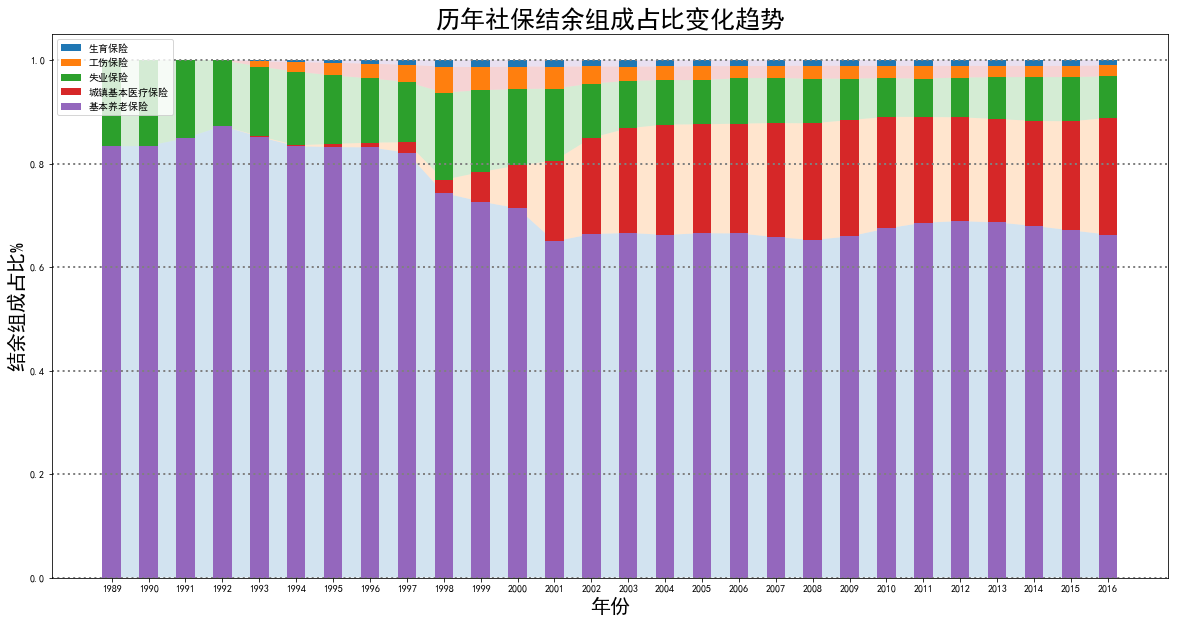

In [15]:
plt.figure(figsize=(20,10))

plt.stackplot(years,
              basic_pension_insurance_p,
             urban_basic_medical_insurance_p,
             unemployment_insurance_p,
             work_injury_insurance_p,
             maternity_insurance_p,
              alpha=0.2,)

# 添加图例


plt.bar(years, maternity_insurance_p_t, width=0.5, label='生育保险')
plt.bar(years, work_injury_insurance_p_t, width=0.5, label='工伤保险')
plt.bar(years, unemployment_insurance_p_t, width=0.5, label='失业保险')
plt.bar(years, urban_basic_medical_insurance_p_t, width=0.5, label='城镇基本医疗保险')
plt.bar(years, basic_pension_insurance_p_t, width=0.5, label='基本养老保险')

plt.legend(loc='upper left')
plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成占比%", fontsize=20)
plt.title("历年社保结余组成占比变化趋势", fontsize=25)
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

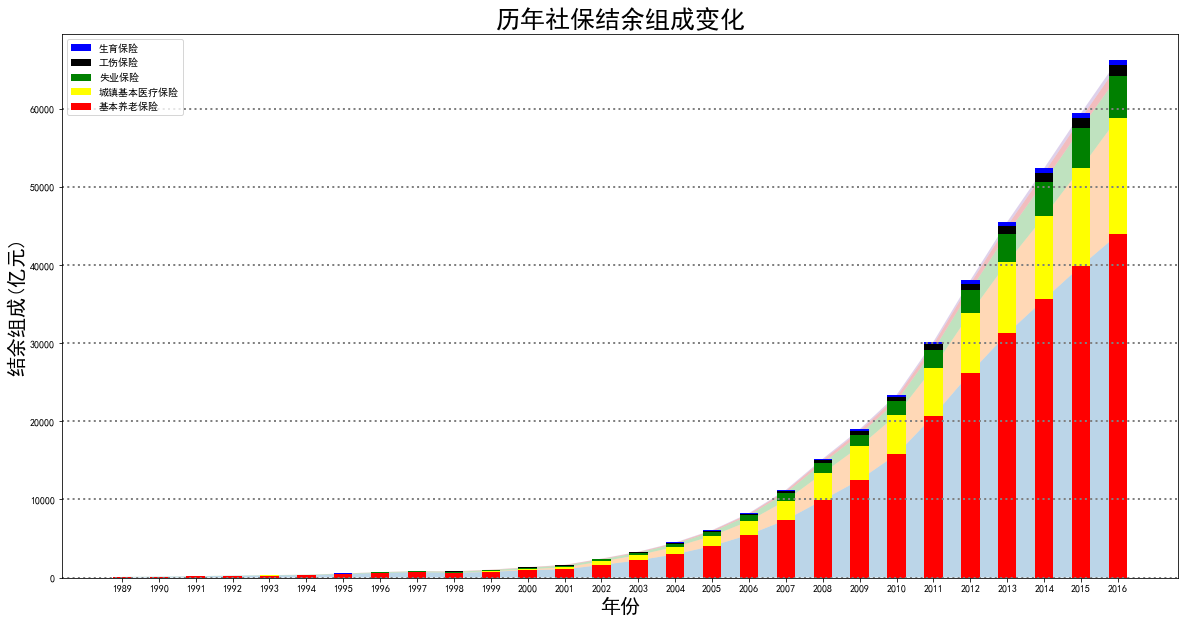

In [16]:
# 堆积柱状图
plt.figure(figsize=(20,10))
plt.stackplot(years, 
              basic_pension_insurance, 
              urban_basic_medical_insurance,
              unemployment_insurance,               
              work_injury_insurance,
              maternity_insurance,
              alpha=0.3)


plt.bar(years, maternity_insurance_t, width=0.5, color="blue", label='生育保险')
plt.bar(years, work_injury_insurance_t, width=0.5, color="black", label='工伤保险')
plt.bar(years, unemployment_insurance_t, width=0.5, color="green", label='失业保险')
plt.bar(years, urban_basic_medical_insurance_t, width=0.5, color="yellow", label='城镇基本医疗保险')
plt.bar(years, basic_pension_insurance_t, width=0.5, color="red", label='基本养老保险')

plt.xlabel("年份", fontsize=20)
plt.ylabel("结余组成(亿元)", fontsize=20)
plt.title("历年社保结余组成变化", fontsize=25)
# 添加图例
plt.legend(loc='upper left')
# 添加网格线
plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)